Analisis de datos

In [1]:
from categorias import get_categorias
from medios import get_capturas_df, get_medios_path, get_medios_polipos_path


df = get_capturas_df()
# categorias = get_categorias(df)


In [2]:
# df

In [3]:
# categorias

In [4]:


# categorias_dict = list(categorias.to_dict().values())[1] #,list(categorias.to_dict().values())[1]}
# categorias_dict

Librerias de tensorflow

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2023-03-08 23:43:10.614939: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-08 23:43:10.876496: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-08 23:43:10.876520: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-08 23:43:12.668856: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [6]:
medios_path = get_medios_polipos_path()
print(medios_path)

import pathlib
data_dir = pathlib.Path(medios_path)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

/mnt/e/Gastroclub/EstudiosPolipos/
403


In [7]:
# categoria = categorias.iloc[0]
# print(categoria["Nombre"])
# import random
# imagen = list(data_dir.glob(f'{categoria["Categoria"]}/*'))
# imagen_int = random.randint(0, len(imagen))
# print(categoria["Categoria"])
# # print (imagen[imagen_int])
# PIL.Image.open(str(imagen[imagen_int]))


In [8]:
# categoria = categorias.iloc[2]
# print(categoria["Nombre"])
# import random
# imagen = list(data_dir.glob(f'{categoria["Categoria"]}/*'))
# imagen_int = random.randint(0, len(imagen))

# print (imagen[imagen_int])
# PIL.Image.open(str(imagen[imagen_int]))

In [9]:
batch_size = 32
img_height = 200
img_width = 200

#TODO: pre-proceso de distintos tamanios

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1026 files belonging to 2 classes.
Using 821 files for training.


2023-03-08 23:43:16.356678: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:13:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-08 23:43:16.356827: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-08 23:43:16.356887: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-08 23:43:16.356925: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-08 23:43:16.357014: W tensorf

In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1026 files belonging to 2 classes.
Using 205 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names[:10])

['NOPOLIPO', 'POLIPO']


In [13]:
train_ds


<BatchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
categorias = ["POLIPOS", "NOPOLIPOS"]


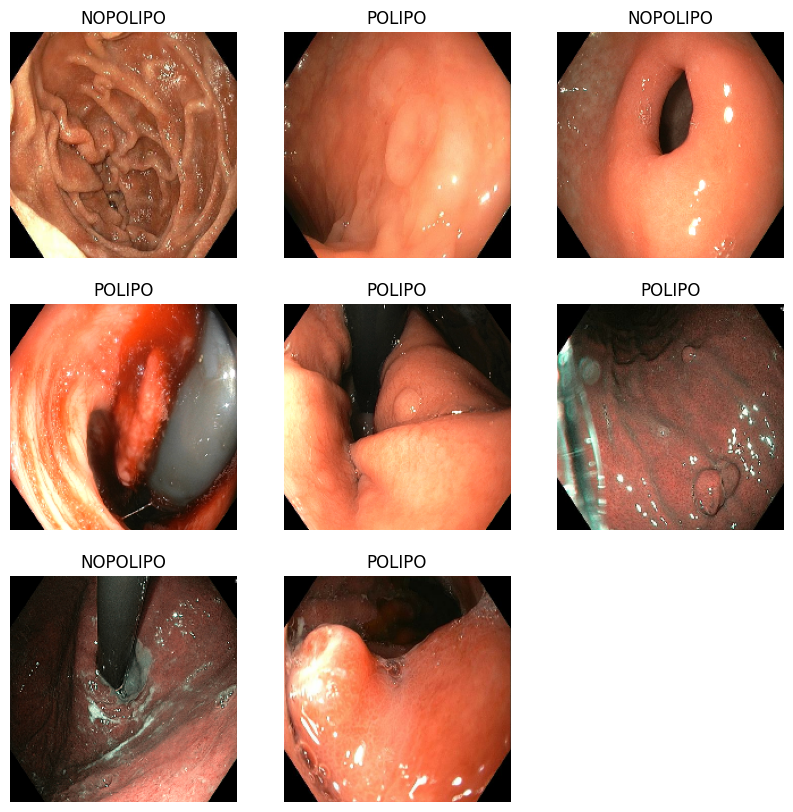

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
#         titulo = list(categorias[categorias['Categoria'] == int(class_names[labels[i]])]["Nombre"])[0]
        
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [17]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 200, 200, 3)
(32,)


In [ ]:
# break

In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.shuffle(1000).cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
normalization_layer = layers.Rescaling(1./255)


In [20]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
0.0 1.0


2023-03-08 23:44:12.421044: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [21]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_top_k_categorical_accuracy'])

In [ ]:
#model.compile(loss='mse', optimizer='adam', metrics=[rmse])


In [23]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        1

In [ ]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=2
)

Epoch 1/50
26/26 - 8s - loss: 0.9027 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.6808 - val_sparse_top_k_categorical_accuracy: 1.0000 - 8s/epoch - 297ms/step
Epoch 2/50
26/26 - 6s - loss: 0.6568 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.6380 - val_sparse_top_k_categorical_accuracy: 1.0000 - 6s/epoch - 217ms/step
Epoch 3/50


In [ ]:
acc = history.history['sparse_top_k_categorical_accuracy']
val_acc = history.history['val_sparse_top_k_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from PIL import Image
test_image_base = "/home/franciscor/Gastroclub/new"
img = Image.open(f"{test_image_base}/duodeno_01.png").resize((img_height, img_width), Image.ANTIALIAS)
img

In [ ]:
img = np.array(img)

prediction = model.predict(img[None,:,:])
# print(decode_predictions(prediction, top=3)[0])
print(prediction)
max_prediction = np.argmax(prediction)

class_names[labels[max_prediction]]




In [ ]:
tf.keras.models.save_model(
    model,
    "/home/franciscor/output",
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)